In [52]:
# Utils
import json
import random
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont

def read_json_file(jsonfile):
    with open(str(jsonfile)) as f:
        data = json.load(f)
    return data

def xywh2xyxy(bbox):
    bbox[2] += bbox[0]
    bbox[3] += bbox[1]
    return bbox

def putText(img, text, start,
            color=(0,255,0),
            size=5,
            font='MINGLIU.ttf'):
    pil_img = Image.fromarray(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_img)
    font_text = ImageFont.truetype(font=font, size=size, encoding='utf-8')
    draw.text(start, text, color, font=font_text)
    cv2_img = cv2.cvtColor(np.asarray(pil_img), cv2.COLOR_RGB2BGR)
    return cv2_img


def draw_bboxes(img, bboxes, labels=None):
    if labels is None:
        colors = [(0,0,255) for _ in range(len(bboxes))]
    else:
        label_to_color = {}
        for k in set(labels):
            random.seed(int(k))
            color = [random.randint(0,255) for _ in range(3)]
            label_to_color[k] = color
        colors = [label_to_color[k] for k in labels]

    for i in range(len(bboxes)):
        bbox, color = bboxes[i], colors[i]
        cv2.rectangle(img, bbox[:2], bbox[2:], color, 10)
        if labels is not None:
            x0 = bbox[0]
            y0 = bbox[1]
            text = str(labels[i])
            cv2.putText(img, text, (x0,y0), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 10)
    return img

In [55]:
# For public_train/pill folder
import cv2
from pathlib import Path 

SHOW_SIZE = (1000,1000)

img_files = [p for p in Path('document/dataset/public_train/pill/image').rglob('*') if p.suffix in ('.jpg', '.png')]

i = 0

while True:
    img_file = img_files[i]
    label_file = img_file.parents[1] / 'label' / (img_file.stem + '.json')
    
    img = cv2.imread(str(img_file))

    bboxes, labels = [], []
    for data in read_json_file(label_file):
        bbox = [data['x'], data['y'], data['w'], data['h']]
        label = data['label']
        bbox = xywh2xyxy(bbox)
        bboxes += [bbox]
        labels += [label]
    
    img = draw_bboxes(img, bboxes, labels)

    cv2.imshow('Train Pill', cv2.resize(img, SHOW_SIZE))
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    elif k == ord('a') and i > 0:
        i -= 1
    elif k == ord('d') and i < len(img_files)-1:
        i += 1
cv2.destroyAllWindows()




In [62]:
import cv2
from pathlib import Path 
from lib.utils import utils

SHOW_SIZE = (1000,1500)

img_files = [p for p in Path('document/dataset/public_train/prescription/image').rglob('*') if p.suffix in ('.jpg', '.png')]

i = 0

while True:
    img_file = img_files[i]
    label_file = img_file.parents[1] / 'label' / (img_file.stem + '.json')

    img = cv2.imread(str(img_file))

    for data in read_json_file(label_file):
        txt = "id:{},label:{},text:{}".format(data['id'], data['label'], data['text'])
        bbox = data['box']

        crop_img = utils.crop_image(img, bbox)
        
        cv2.rectangle(img, bbox[:2], bbox[2:], (0,0,0), 1)
        # cv2.putText(img, txt, (bbox[0],bbox[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 1)
        # img = putText(img, txt, (bbox[0],bbox[1]), (0,255,0), 15, font='VHAVANB.TTF')

    cv2.imshow('Train Pressciption', cv2.resize(img, SHOW_SIZE))
    cv2.imshow('crop img', crop_img)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    elif k == ord('a') and i > 0:
        i -= 1
    elif k == ord('d') and i < len(img_files)-1:
        i += 1
cv2.destroyAllWindows()


In [54]:
# For public_train/pill folder
import cv2
from pathlib import Path 

SHOW_SIZE = (1000,2000)

img_files = [p for p in Path('dataset/public_train/pill/image').rglob('*') if p.suffix in ('.jpg', '.png')]

labels = []
for img_file in img_files:
    label_file = img_file.parents[1] / 'label' / (img_file.stem + '.json')
    
    for data in read_json_file(label_file):
        labels.append(data['label'])

print("The Number of labels: {}".format(len(labels)))
print("The Number of difference label: {}".format(len(set(labels))))

The Number of labels: 0
The Number of difference label: 0


In [85]:
labels

[107,
 107,
 107,
 107,
 1,
 61,
 61,
 8,
 104,
 91,
 89,
 2,
 2,
 27,
 43,
 91,
 29,
 29,
 43,
 51,
 37,
 51,
 92,
 64,
 64,
 61,
 61,
 51,
 51,
 89,
 43,
 43,
 64,
 64,
 64,
 40,
 104,
 99,
 99,
 26,
 26,
 91,
 64,
 104,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 17,
 91,
 51,
 51,
 36,
 51,
 94,
 46,
 87,
 51,
 94,
 64,
 64,
 31,
 64,
 40,
 104,
 64,
 107,
 107,
 107,
 107,
 107,
 107,
 37,
 37,
 37,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 107,
 51,
 51,
 36,
 10,
 10,
 65,
 65,
 97,
 64,
 64,
 40,
 38,
 54,
 61,
 37,
 61,
 51,
 51,
 36,
 10,
 10,
 65,
 65,
 97,
 85,
 54,
 45,
 8,
 41,
 11,
 46,
 51,
 99,
 10,
 104,
 43,
 7,
 7,
 91,
 91,
 43,
 86,
 55,
 107,
 107,
 107,
 107,
 107,
 29,
 99,
 10,
 84,
 43,
 89,
 102,
 43,
 54,
 46,
 19,
 19,
 50,
 10,
 10,
 60,
 2,
 27,
 89,
 2,
 44,
 99,
 44,
 99,
 92,
 7,
 7,
 51,
 51,
 23,
 8,
 46,
 106,
 99,
 43,
 7,
 64,
 64,
 26,
 91,
 107,
 107,
 107

In [86]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107}

In [94]:
read_json_file('dataset/public_train/prescription/label/VAIPE_P_TRAIN_1151.json')

[{'id': 2, 'text': '1/1', 'label': 'other', 'box': [58, 28, 113, 58]},
 {'id': 3,
  'text': 'PK Số 5.1 [TĐ]',
  'label': 'other',
  'box': [26, 89, 137, 112]},
 {'id': 4,
  'text': 'Số phiếu 67626/2019',
  'label': 'other',
  'box': [372, 92, 547, 121]},
 {'id': 5, 'text': '1373137', 'label': 'other', 'box': [626, 101, 688, 118]},
 {'id': 6,
  'text': 'TOA THUỐC BHYT',
  'label': 'other',
  'box': [260, 122, 508, 152]},
 {'id': 9, 'text': 'Nam', 'label': 'other', 'box': [620, 160, 655, 177]},
 {'id': 10, 'text': 'Nữ', 'label': 'other', 'box': [685, 160, 708, 177]},
 {'id': 14, 'text': 'TQ', 'label': 'other', 'box': [187, 207, 214, 227]},
 {'id': 15, 'text': '9T', 'label': 'other', 'box': [300, 207, 321, 224]},
 {'id': 16, 'text': '97', 'label': 'other', 'box': [366, 207, 386, 224]},
 {'id': 17, 'text': '317', 'label': 'other', 'box': [436, 207, 466, 225]},
 {'id': 18, 'text': '32006', 'label': 'other', 'box': [509, 207, 561, 225]},
 {'id': 19,
  'text': 'MMHg Thân nhiệt:',
  'label': '

In [95]:
read_json_file('dataset/public_train/prescription/label/VAIPE_P_TRAIN_1152.json')

[{'id': 1, 'text': '1/1', 'label': 'other', 'box': [58, 28, 113, 58]},
 {'id': 3,
  'text': 'Số phiếu 907/2019',
  'label': 'other',
  'box': [372, 91, 525, 123]},
 {'id': 4, 'text': '4659566', 'label': 'other', 'box': [626, 100, 688, 118]},
 {'id': 5,
  'text': 'TOA THUỐC BHYT',
  'label': 'other',
  'box': [260, 122, 508, 152]},
 {'id': 8, 'text': 'Nam', 'label': 'other', 'box': [620, 160, 655, 177]},
 {'id': 9, 'text': 'Nữ', 'label': 'other', 'box': [685, 160, 708, 177]},
 {'id': 13, 'text': '35', 'label': 'other', 'box': [366, 207, 387, 224]},
 {'id': 14, 'text': '210', 'label': 'other', 'box': [436, 207, 468, 225]},
 {'id': 15, 'text': '00068', 'label': 'other', 'box': [509, 207, 560, 225]},
 {'id': 16, 'text': '2', 'label': 'other', 'box': [249, 208, 262, 224]},
 {'id': 17, 'text': '35', 'label': 'other', 'box': [300, 208, 322, 225]},
 {'id': 18,
  'text': 'MMHg Thân nhiệt:',
  'label': 'other',
  'box': [450, 231, 595, 255]},
 {'id': 19,
  'text': 'lần/phút Huyết áp:',
  'label'

In [1]:
# Check bbox detector
import cv2 
import numpy as np 
from pathlib import Path 
from lib.detection_engine import detection_engine
from lib.utils import utils

detectionEngine = detection_engine.DetectionEngine()

SHOW_SIZE = (1000,1000)
img_files = [p for p in Path('document/dataset/public_test/pill/image').rglob('*') if p.suffix in ('.jpg', '.png')]

i = 0
while True:
    imgfile = img_files[i]
    img = cv2.imread(str(imgfile))
    bboxes, scores = detectionEngine.predict(img)
    if bboxes is not None:
        texts = [str(round(score,2)) for score in scores]
        img = utils.draw_bboxes(img, bboxes, texts)
    
    cv2.imshow("PILL", cv2.resize(img, SHOW_SIZE))
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    elif k == ord('a') and i > 0:
        i -= 1
    elif k == ord('d') and i < len(img_files)-1:
        i += 1
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'None'

In [15]:
import os 


data = list(open('document/dataset/train_val.txt', 'r'))

In [22]:
data[0].strip().split()

['train', 'VAIPE_P_405_13.jpg']

In [24]:
file = 'VAIPE_P_405_13.jpg'

In [27]:
file.split('_')[2]

'405'

In [3]:
import cv2 
from lib.utils import utils

f_ = 'asset/VAIPE_P_117_2.jpg'

utils.show_pill_label(imgfile='asset/VAIPE_P_4_61.jpg',
                    lbfile='asset/VAIPE_P_4_61.json')

In [4]:
im = cv2.imread('asset/VAIPE_P_4_61.jpg')
im.shape

(4032, 3024, 3)

In [8]:
from PIL import Image

pill_img = Image.open(f_)

In [9]:
pill_img.size

(4032, 3024)

In [5]:
pill_img.height

743

In [2]:
import pandas as pd 

df = pd.read_csv('asset/file_tong_hop.csv')


In [3]:
df

,Unnamed: 0,image_name,train/val,id,diagnose,drugname,bbox
0,0,VAIPE_P_0_0_0.jpg,val,64,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,HOẠT HUYẾT DƯỠNG NÃO 150mg+20mg,1520 1824 236 261
1,1,VAIPE_P_0_0_1.jpg,val,64,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,HOẠT HUYẾT DƯỠNG NÃO 150mg+20mg,2227 2090 267 261
2,2,VAIPE_P_0_1_0.jpg,train,64,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,HOẠT HUYẾT DƯỠNG NÃO 150mg+20mg,980 1712 291 323
3,3,VAIPE_P_0_1_1.jpg,train,64,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,HOẠT HUYẾT DƯỠNG NÃO 150mg+20mg,1402 1774 291 317
4,4,VAIPE_P_0_10_0.jpg,train,64,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,HOẠT HUYẾT DƯỠNG NÃO 150mg+20mg,1141 1681 279 279
...,...,...,...,...,...,...,...
32823,32823,VAIPE_P_9_6_0.jpg,train,107,Chấn đoán: J02 - Viêm họng cấp; (J30.3) Viêm m...,Thuoc ngoai,2141 1837 591 502
32824,32824,VAIPE_P_9_6_1.jpg,train,107,Chấn đoán: J02 - Viêm họng cấp; (J30.3) Viêm m...,Thuoc ngoai,2697 1228 529 529
32825,32825,VAIPE_P_9_6_2.jpg,train,107,Chấn đoán: J02 - Viêm họng cấp; (J30.3) Viêm m...,Thuoc ngoai,1004 735 905 923
32826,32826,VAIPE_P_9_6_3.jpg,train,107,Chấn đoán: J02 - Viêm họng cấp; (J30.3) Viêm m...,Thuoc ngoai,2007 269 1004 1021


In [6]:
for i in range(len(df)):
    if df['id'].loc[i] == 25:
        print('TRAIN id=25',df['image_name'].loc[i])
    if df['id'].loc[i] == 49:
        print('TRAIN id=49',df['image_name'].loc[i])
    if df['id'].loc[i] == 13:
        print('VAL id=13',df['image_name'].loc[i])

TRAIN id=49 VAIPE_P_1171_0_2.jpg
TRAIN id=25 VAIPE_P_1172_0_0.jpg
VAL id=13 VAIPE_P_695_2_0.jpg
VAL id=13 VAIPE_P_695_5_0.jpg


In [8]:
lbs = [str(x) for x in range(107)]

In [9]:
print(lbs)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106']


In [3]:
import numpy as np 
from PIL import Image
from pycocotools.coco import COCO
annofile = 'asset/origin_mask.json'

In [4]:
coco_annotation = COCO(annotation_file=annofile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive

Number of Unique Categories: 2
Category IDs:
[1, 2]


In [6]:
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Categories Names:
['cabinet', 'string']


In [7]:
# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

KeyError: 'supercategory'

In [8]:
# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[1], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {1}:")
print(anns)

Annotations for Image ID 1:
[{'id': 0, 'iscrowd': 0, 'image_id': 1, 'category_id': 1, 'segmentation': [[337.174825174825, 772.7738927738924, 340.15850815850797, 772.1771561771558, 368.8018648018646, 792.4662004662, 438.02331002330976, 778.7412587412583, 452.9417249417247, 747.1142191142187, 501.8741258741256, 735.7762237762233, 421.91142191142166, 423.68298368298343, 403.4125874125872, 408.16783216783193, 383.1235431235429, 401.0069930069928, 358.65734265734244, 398.6200466200464, 337.174825174825, 401.0069930069928, 316.8857808857807, 409.36130536130514, 300.177156177156, 421.8927738927737, 283.4685314685313, 440.39160839160814, 273.9207459207458, 461.87412587412564, 270.93706293706276, 477.38927738927714]], 'bbox': [270.93706293706276, 398.6200466200464, 230.93706293706282, 393.8461538461536], 'area': 59451.946294575595}, {'id': 1, 'iscrowd': 0, 'image_id': 1, 'category_id': 2, 'segmentation': [[176.18768328445736, 650.6353861192566, 224.73509286412497, 733.2160312805469, 298.3069403

In [9]:
import json 
file = 'document/output/benchmark/gt_results.json'
with open(file) as f:
    data = json.load(f)
data

{'categories': [{'id': 0, 'name': '0', 'supercategory': ''},
  {'id': 1, 'name': '1', 'supercategory': ''},
  {'id': 2, 'name': '2', 'supercategory': ''},
  {'id': 3, 'name': '3', 'supercategory': ''},
  {'id': 4, 'name': '4', 'supercategory': ''},
  {'id': 5, 'name': '5', 'supercategory': ''},
  {'id': 6, 'name': '6', 'supercategory': ''},
  {'id': 7, 'name': '7', 'supercategory': ''},
  {'id': 8, 'name': '8', 'supercategory': ''},
  {'id': 9, 'name': '9', 'supercategory': ''},
  {'id': 10, 'name': '10', 'supercategory': ''},
  {'id': 11, 'name': '11', 'supercategory': ''},
  {'id': 12, 'name': '12', 'supercategory': ''},
  {'id': 13, 'name': '13', 'supercategory': ''},
  {'id': 14, 'name': '14', 'supercategory': ''},
  {'id': 15, 'name': '15', 'supercategory': ''},
  {'id': 16, 'name': '16', 'supercategory': ''},
  {'id': 17, 'name': '17', 'supercategory': ''},
  {'id': 18, 'name': '18', 'supercategory': ''},
  {'id': 19, 'name': '19', 'supercategory': ''},
  {'id': 20, 'name': '20',

In [24]:
import json 
file = 'asset/drugname_to_id.json'
with open(file) as f:
    data = json.load(f)
data

{'EBITAC 12.5 10mg + 12,5mg': ['45'],
 'FIBROFIN-145 145mg': ['58'],
 'PAMLONOR 5mg': ['8'],
 'MEGLUCON 1000 1000mg': ['56'],
 'DƯỠNG TÂM AN THẦN': ['44'],
 'SAVI ACARBOSE 100 100mg': ['96'],
 "MEGLUCON TAB 850MG 3X10'S 850mg": ['55'],
 'SERGUROP 10mg': ['5', '70', '14'],
 'FABAMOX 500MG 500mg': ['49', '10'],
 'HAPENXIN CAPSULES 0,5g': ['26', '61'],
 'C1000 FLOODE 1g': ['106'],
 'LIVONIC 2500mg+400mg+500mg+85mg': ['68'],
 'DICLOFENAC 50mg': ['40', '39'],
 'AMOXICILLIN 500MG 0,5g': ['10'],
 'Metformin (Metformin 500) 500mg': ['54'],
 'PARACETAMOL 500MG 500mg': ['0', '99', '89', '91', '60'],
 'SETBLOOD 115mg+100mg+50mcg': ['104', '100'],
 'MEZAFEN 60mg': ['40', '78'],
 'COLCHICIN 1mg': ['30'],
 'ATORIS 20MG 20mg': ['13', '15'],
 'COSYNDO B 175mg+175mg+125mcg': ['104', '32'],
 'CEPHALEXIN PMP 500 0,5g': ['26'],
 'HOẠT HUYẾT DƯỠNG NÃO BDF 150mg+5mg': ['64'],
 'CEFACYL 500 0,5g': ['26', '61'],
 'SAVI LOSARTAN 50 50mg': ['72'],
 'AMOXYCILIN 250MG 0,25g': ['9'],
 'Telmisartan % hydroclorothia

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')

config['weights'] = 'models/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False
detector = Predictor(config)

/home/khai/miniconda3/envs/vaipe/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/khai/miniconda3/envs/vaipe/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


'1) MEGLUCON 1000 1000 mg'

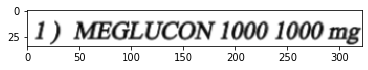

In [23]:
imfile = 'asset/ocr1.png'
img = Image.open(imfile)
plt.imshow(img)
s = detector.predict(img)
s

'Chần đoán: E11 - Bệnh đái tháo đường không phụ thuộc insuline'

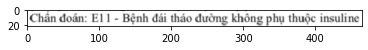

In [22]:
imfile = 'asset/ocr2.png'
img = Image.open(imfile)
plt.imshow(img)
s = detector.predict(img)
s

'03100000099'

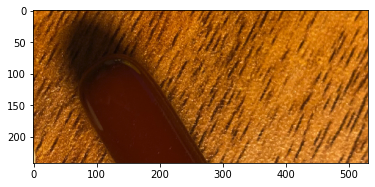

In [33]:
imfile = 'asset/ocr5.png'
img = Image.open(imfile)
plt.imshow(img)
s = detector.predict(img)
s

'03100000099'

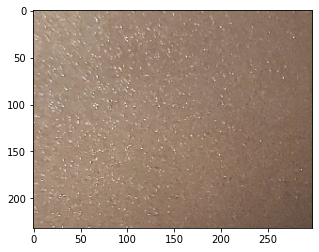

In [34]:
imfile = 'asset/ocr4.png'
img = Image.open(imfile)
plt.imshow(img)
s = detector.predict(img)
s

In [25]:
data['MEGLUCON 1000 1000 mg']

KeyError: 'MEGLUCON 1000 1000 mg'

In [26]:
data['MEGLUCON 1000 1000mg']

['56']

In [28]:
s.split()

['1)', 'MEGLUCON', '1000', '1000', 'mg']

In [29]:
')' in s.split()[0]

True

In [35]:
a = [1,2]

In [36]:
a.append(None)

In [37]:
a

[1, 2, None]

In [63]:
with open('document/output/pres_vietocr/log.txt', 'r') as f:
    for d in f:
        print(d.strip().split('\t'))
        break

['pres_vietocr/1) Cefalexin (Firstlexin 500) 0,5g_26_0.png', '1) Cefalexin (Firstlexin 500) 0,5g']


In [66]:
import cv2
img  = cv2.imread('document/output/pres_vietocr/1) Cefalexin (Firstlexin 500) 0,5g_26_0.png')

In [67]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [68]:
f = open('document/output/vietocr_dataset/train.txt', 'r')
data = f.readlines()

In [70]:
data[0]

'pres_vietocr/1) Cefalexin (Firstlexin 500) 0,5g_26_0.png\t1) Cefalexin (Firstlexin 500) 0,5g\n'